In [36]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

import warnings
warnings.filterwarnings('ignore')

In [37]:
data = pd.read_csv("StudentsPerformance.csv")

# getting the shape of the data
print(data.shape)

(1000, 8)


In [38]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [40]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [41]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot:title={'center':'F=1.81E+03'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.00E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=2.90E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=2.59E-02'}, xlabel='math score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.15E-02'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=1.29E-03'}, xlabel='math score', ylabel='test preparation ...'>]],
       dtype=object)]

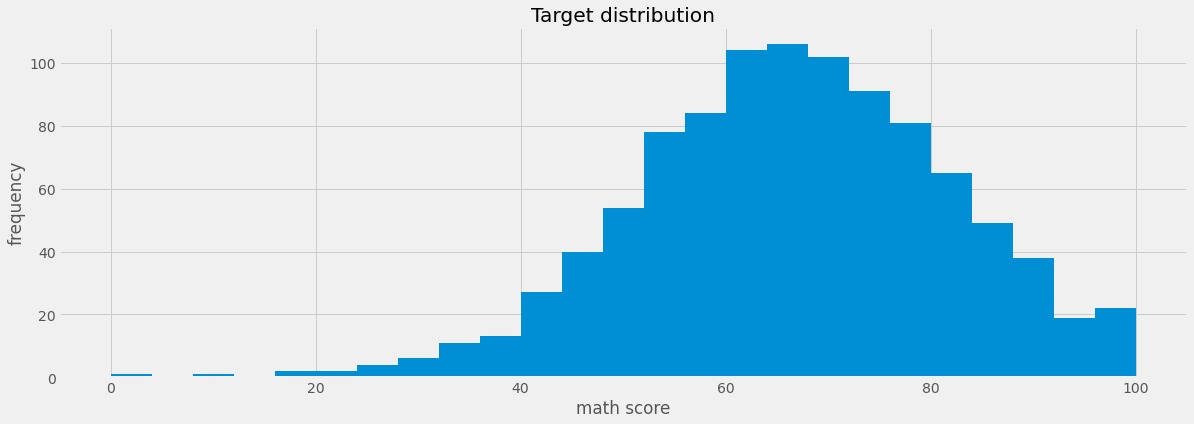

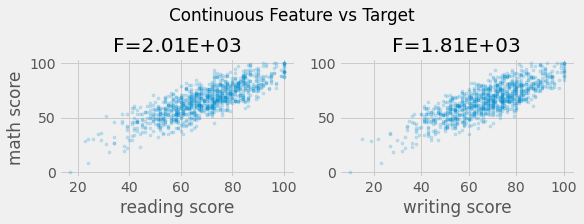

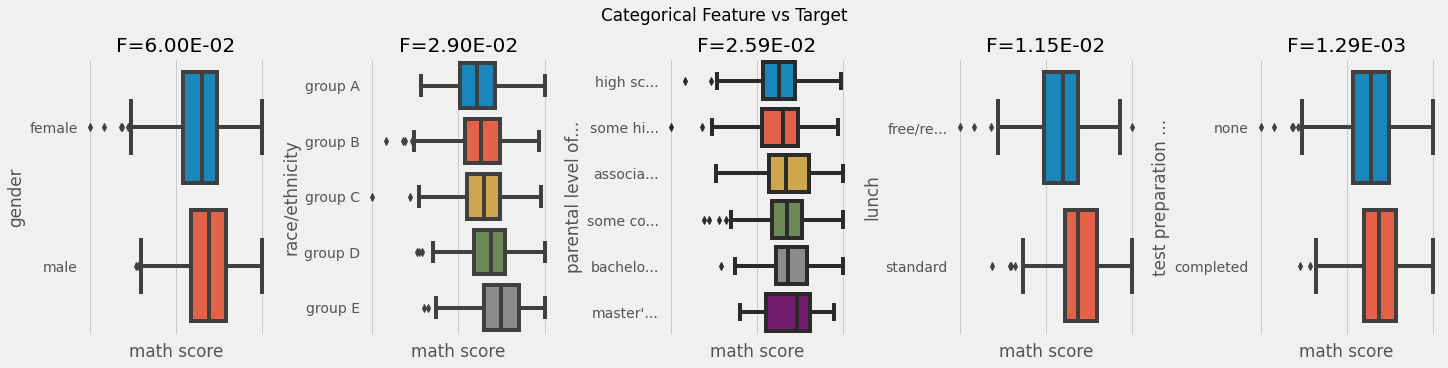

In [42]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=1.02E+04'}, xlabel='writing score', ylabel='reading score'>,
         <AxesSubplot:title={'center':'F=2.01E+03'}, xlabel='math score'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.95E-02'}, xlabel='reading score', ylabel='gender'>,
         <AxesSubplot:title={'center':'F=2.10E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <AxesSubplot:title={'center':'F=1.65E-02'}, xlabel='reading score', ylabel='parental level of...'>,
         <AxesSubplot:title={'center':'F=1.38E-02'}, xlabel='reading score', ylabel='lunch'>,
         <AxesSubplot:title={'center':'F=6.45E-03'}, xlabel='reading score', ylabel='test preparation ...'>]],
       dtype=object)]

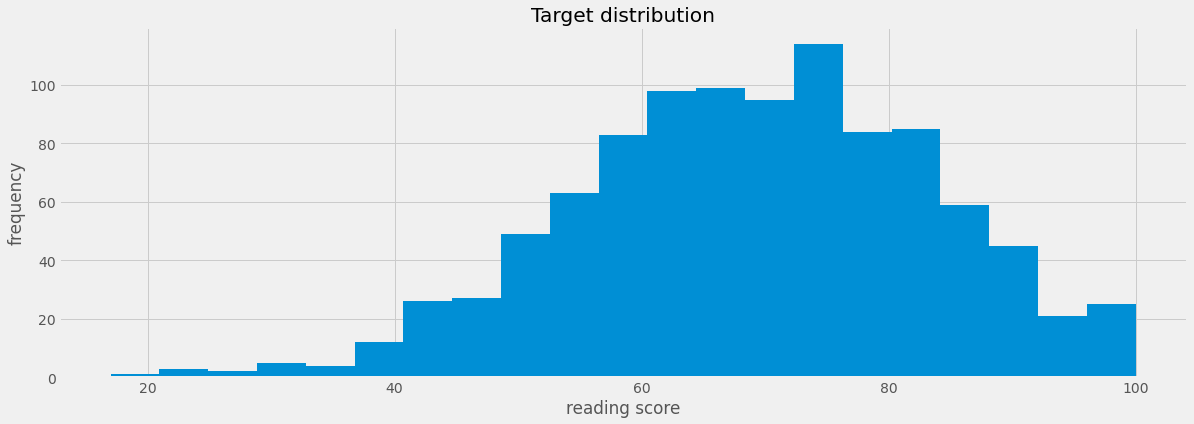

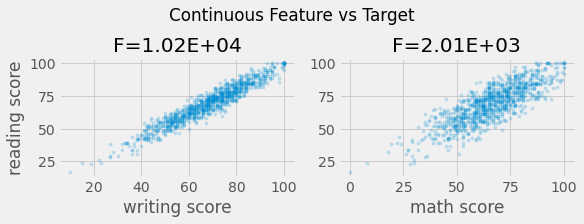

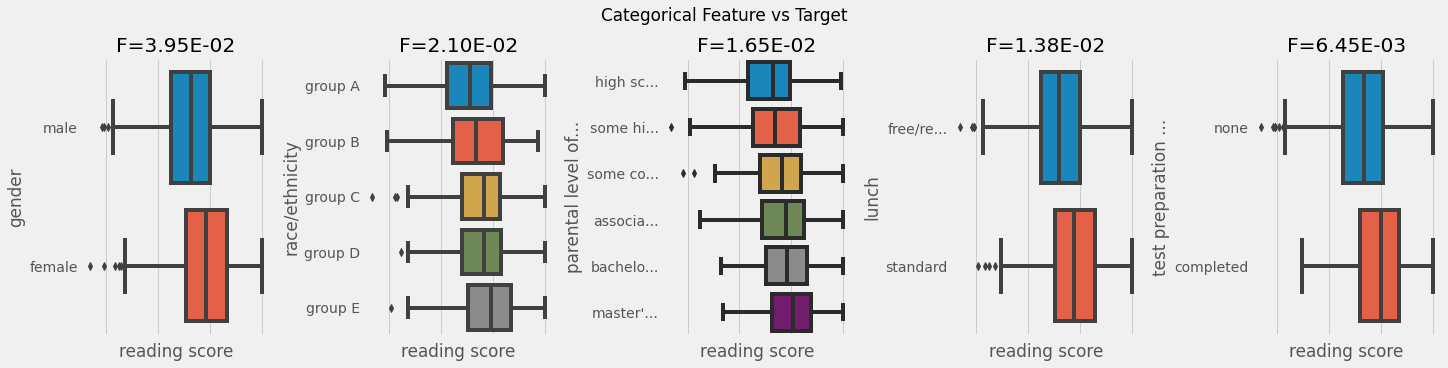

In [43]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

In [44]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [45]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

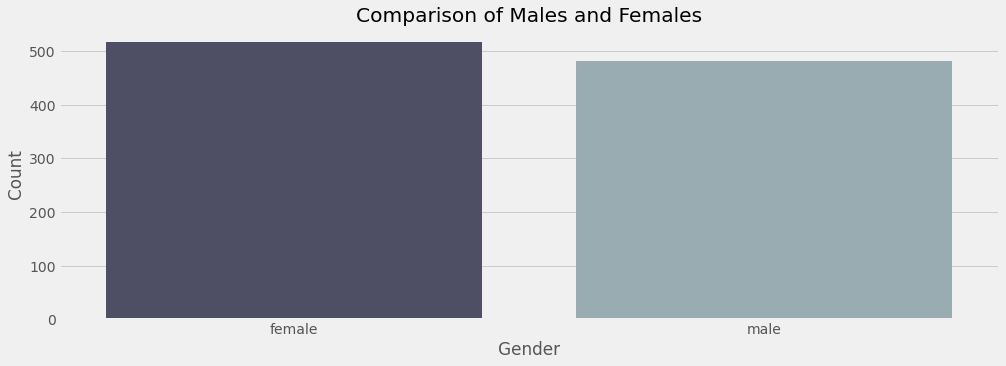

In [46]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

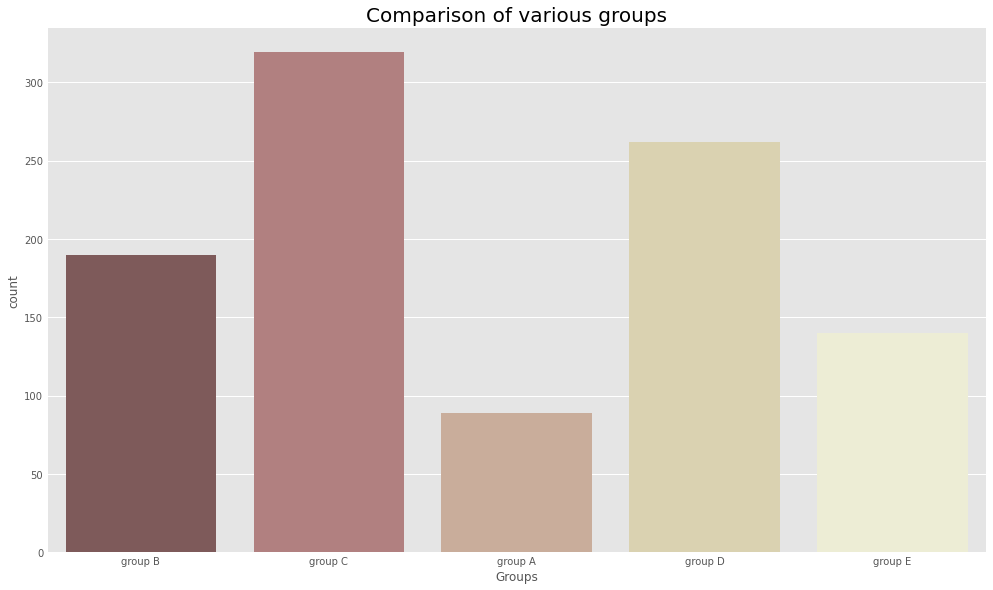

In [47]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()


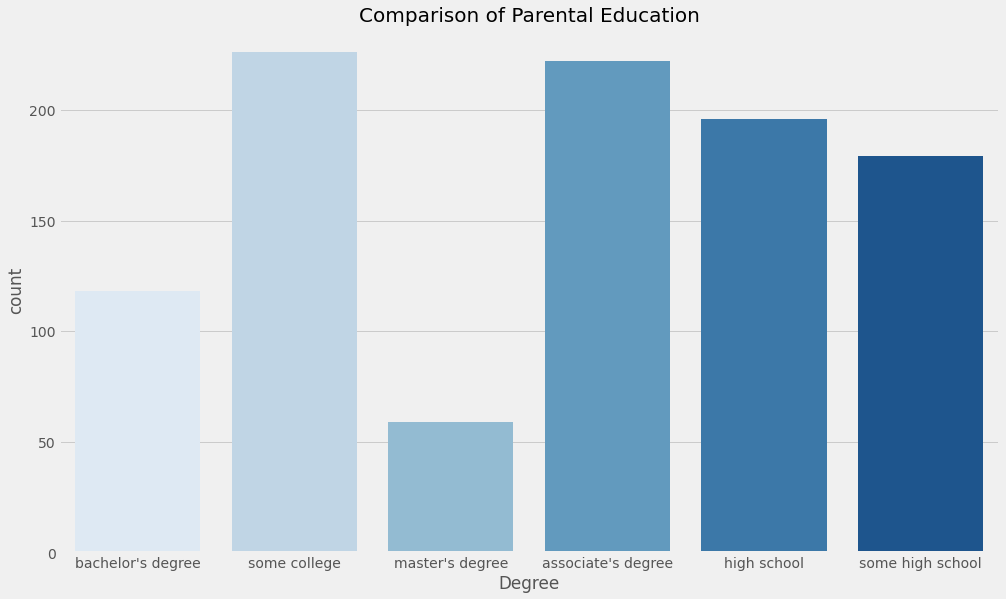

In [48]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

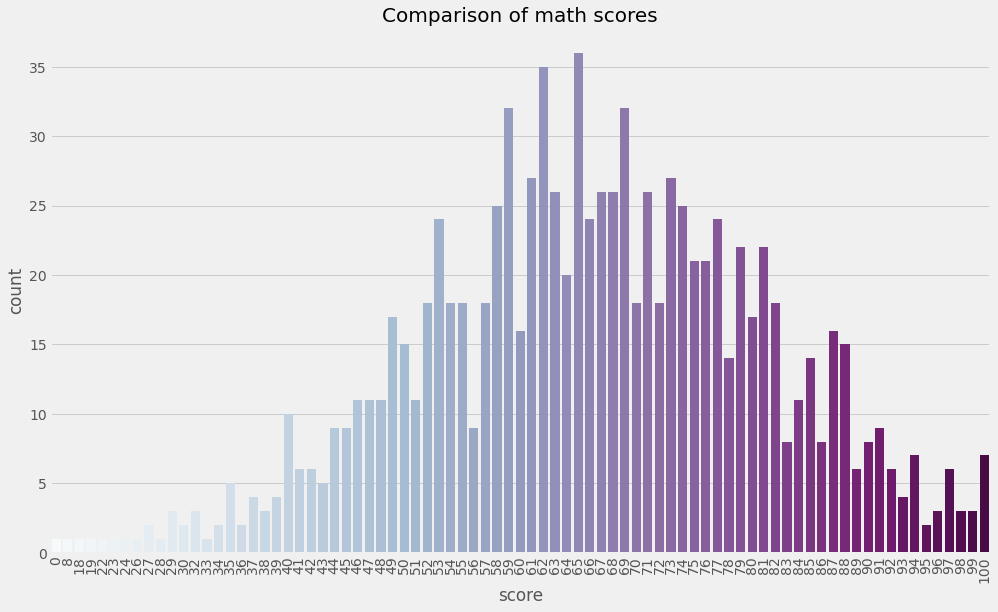

In [49]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

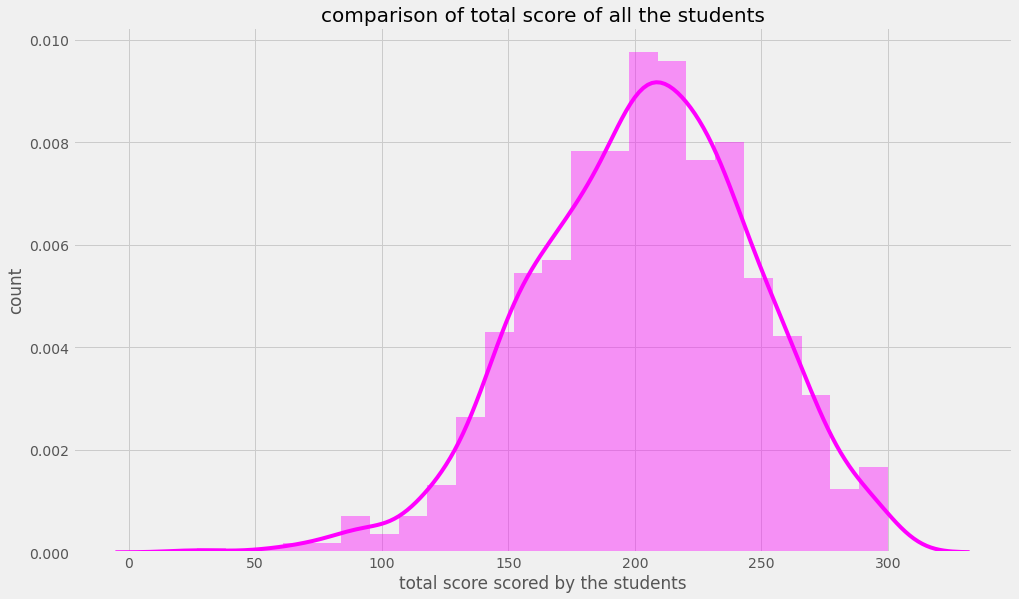

In [50]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

In [58]:
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')


# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

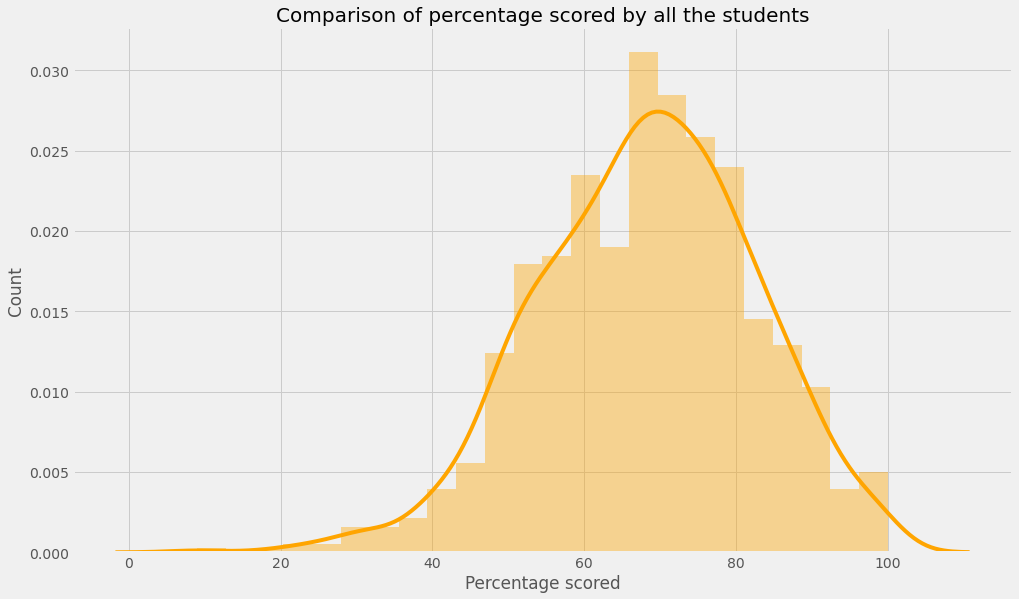

In [59]:
# importing math library to use ceil
from math import * 

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

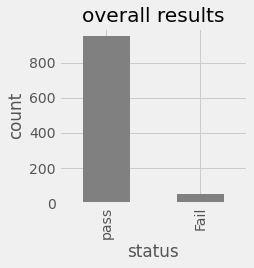

In [60]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (3, 3))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [61]:
def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

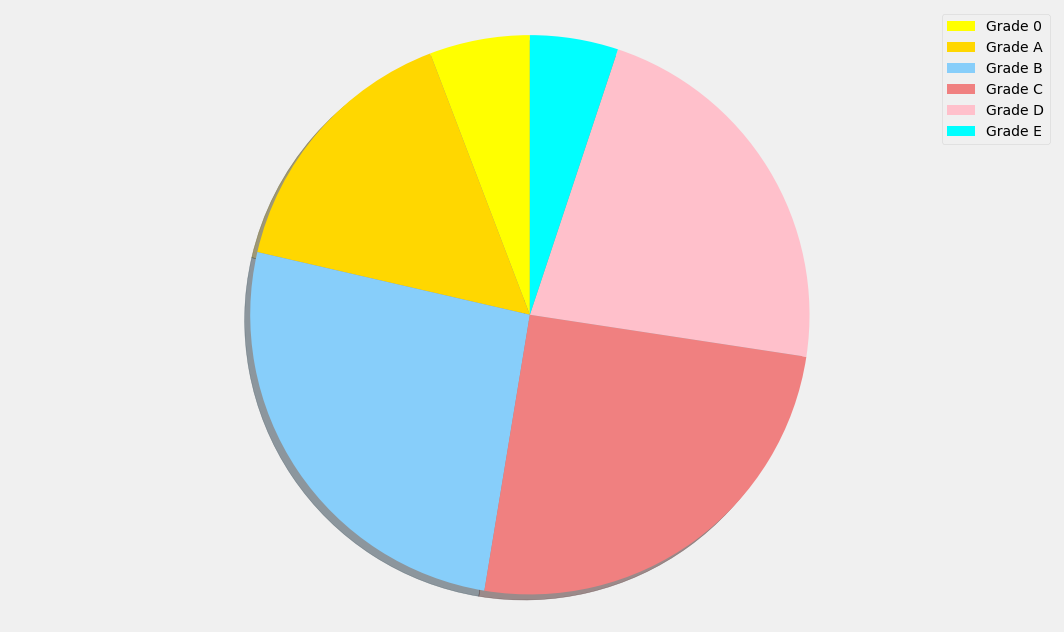

In [62]:

# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['grades'] = data['grades'].replace('O', 0)
data['grades'] = data['grades'].replace('A', 1)
data['grades'] = data['grades'].replace('B', 2)
data['grades'] = data['grades'].replace('C', 3)
data['grades'] = data['grades'].replace('D', 4)
data['grades'] = data['grades'].replace('E', 5)


# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

In [77]:
x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [91]:

# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [92]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.62737008e-01 2.05646597e-01 1.87999073e-01 1.21349296e-01
 9.48420289e-02 6.62856446e-02 4.17327782e-02 1.13721403e-02
 2.97985843e-03 2.35010006e-03 1.74938868e-03 9.50155593e-04
 5.93059466e-06 2.94935634e-33]


In [93]:

from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.98
Testing Accuracy : 0.96


In [98]:

# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 10   6]
 [  0 234]]


In [99]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.98


In [100]:

# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 11   5]
 [  0 234]]


In [97]:

# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

[0.97368421 1.         1.         1.         1.         1.
 0.94736842 0.97368421 0.97368421 1.         1.         1.
 1.         0.97297297 1.         0.97297297 0.97297297 1.
 1.         1.        ]
mean accuracy : 0.9893669985775249
mean standard variance : 0.015456085555719909


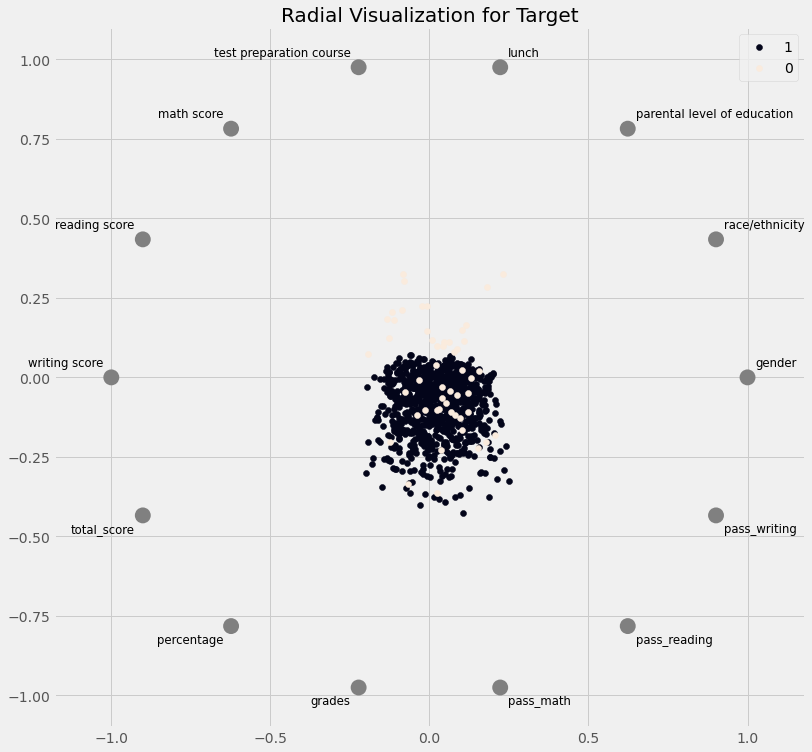

In [101]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()